<div style="text-align: right"> Diego Emiliano Rodea Ruano 

# Osciladores Armónicos

In [1]:
import matplotlib.pyplot as plt         
import numpy as np                      
from scipy.integrate import odeint     
%matplotlib inline 
import matplotlib as mpl
import sympy as sym
label_size = 16
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size 

In [2]:
def armonico(y, t, k, m, B):
    #y1, y2 = y
    y1 = y[0]
    y2 = y[1]
    return [y2, -k * y1 / m - B / m * y2]


In [3]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [6]:
#Pendulo simple
def theta_t(theta_0,dtheta_0,g,l,t):
    omega_0 = np.sqrt(g/l)
    return theta_0 * np.cos(omega_0 * t) + dtheta_0/omega_0 * np.sin(omega_0 * t) 
def pendulo_simple(t = 0):
    fig = plt.figure(figsize = (5,5))
    ax = fig.add_subplot(1, 1, 1)
    x = 2 * np.sin(theta_t(0.1, 0, 9.8, 2, t))
    y =  - 2 * np.cos(theta_t(0.1, 0, 9.8, 2, t))
    ax.plot(x, y, 'ko', ms = 10)
    ax.plot([0], [0], 'rD')
    ax.plot([0, x ], [0, y], 'k-', lw = 1)
    ax.set_xlim(left = -2.2, right = 2.2)
    ax.set_ylim(bottom = -2.2, top = .2)
    fig.canvas.draw()
interact(pendulo_simple, t = (0, 10,.01));

interactive(children=(FloatSlider(value=0.0, description='t', max=10.0, step=0.01), Output()), _dom_classes=('…

### ¿Qué diferencias hay entre oscilador armónico, amortiguado, sobreamortiguado, subamortiguado y críticamente amortiguado?

La característica principal de un oscilador armónico es que está sometido a una fuerza recuperadora, que tiende a devolverlo al punto de equilibrio estable, con una intensidad proporcional a la separación respecto de dicho punto
$$
F=-k(x-x_0)
$$
donde k es la constante de recuperación, y $ x_0$ es la posición de equilibrio.

Este caso más realista consiste en tener en cuenta el rozamiento del aire, que tiende a amortiguar la oscilación. El modelo más usual consiste en tomar un rozamiento proporcional a la velocidad:
$$
F=-b\dot{x}
$$
con lo que la ecuación diferencial, obtenida a partir de la segunda ley de Newton, queda de la forma:
$$
\\ \ddot{x}+ 2\gamma \dot{x} + \omega^2_0 {x}
$$
La solución general a esta ecuación depende de la relación entre $ \gamma$ y $ \omega_0$ . Tenemos tres casos:

### Oscilador subamortiguado:
Este es el caso  $ \gamma < \omega_0$ . La solución es de la forma
 $$\displaystyle x(t) = A \, \mathrm{e}^{- \gamma t} \sin\left( \omega_1 t + \varphi_0 \right) \ $$
 donde  $ \omega_1 = \sqrt{\gamma^2 - \omega_0^2}$

### Oscilador crítico:
En este caso  $ \gamma = \omega_0$ . La solución general es
 $$\displaystyle x(t) = \big( A + B t \big) \, \mathrm{e}^{-\gamma t} \ .$$
 

### Oscilador sobreamortiguado:
Por último, tenemos el caso  $ \gamma > \omega_0$ . La nueva solución general es
 $$\displaystyle x(t) = A \mathrm{e}^{-\gamma t} \sinh\left(\omega_1 t + \varphi_0 \right) \ ,$$
 donde  $ \omega_1 = \sqrt{\gamma^2 - \omega_0^2}$

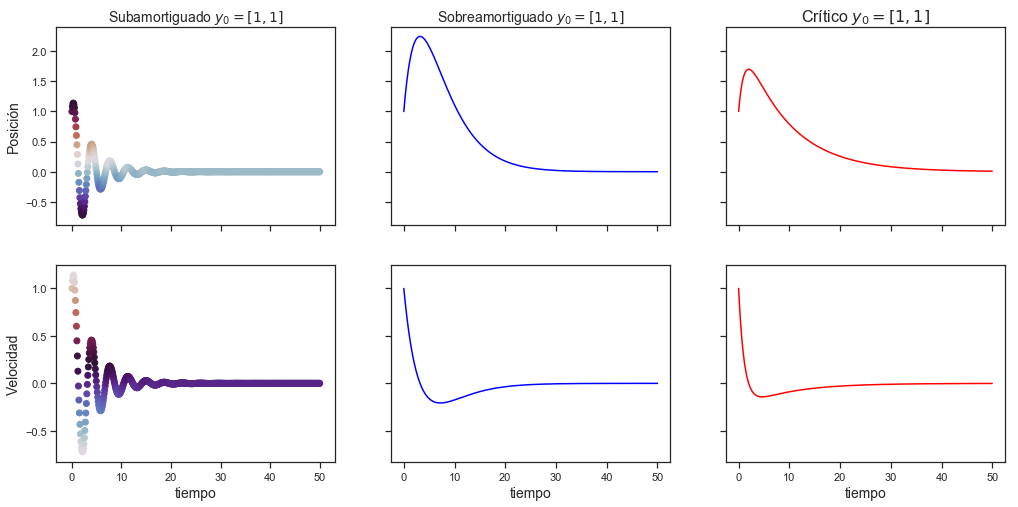

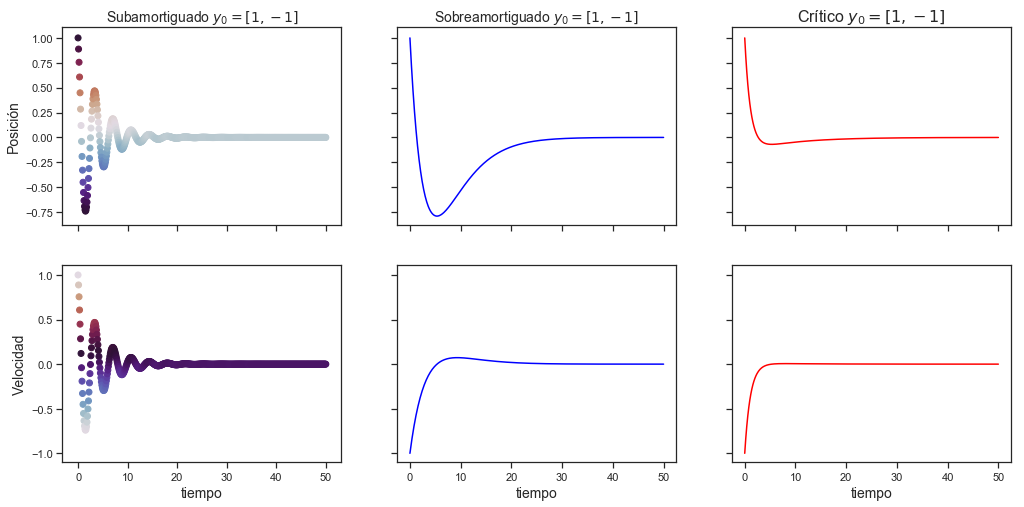

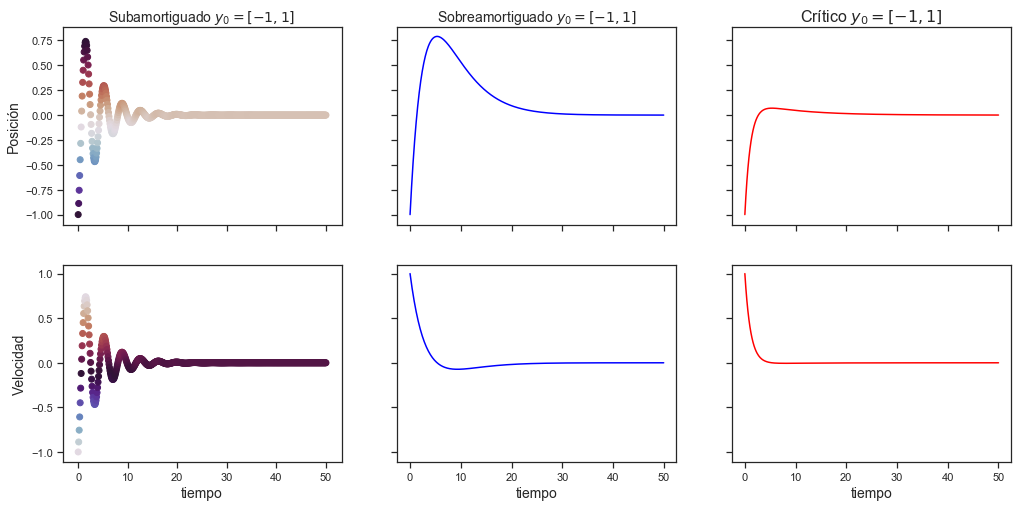

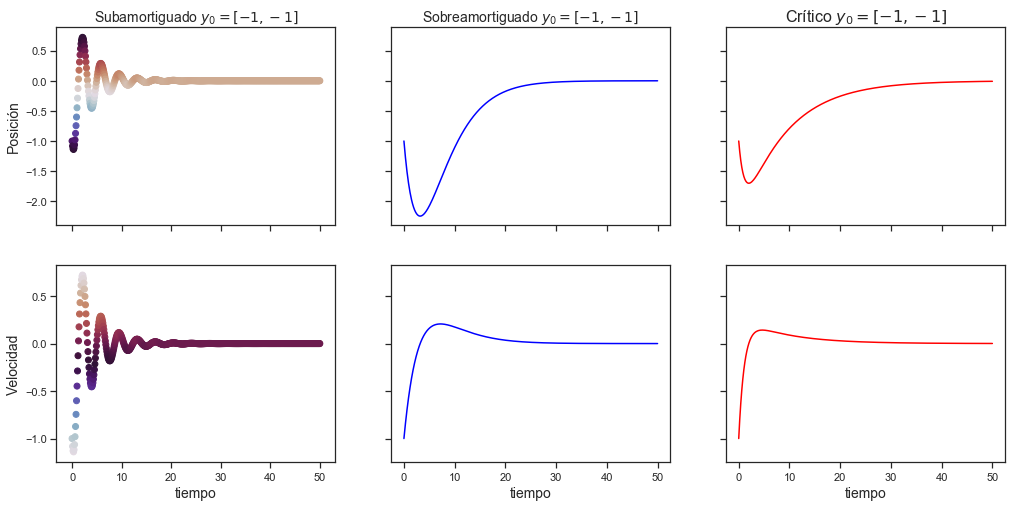

In [22]:
tt = np.linspace(0,50,500)

k = [3, 0.1, 0.0625]
m = 1
B = [0.5, 1, 0.5]

y0=[[1,1],[1,-1],[-1,1],[-1,-1]]

for i in range(0,4):
    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col',sharey='row',figsize =(17,8))
    
    yy1 = odeint(armonico, y0[i], tt, args=(k[0], m, B[0]))
    yy2 = odeint(armonico, y0[i], tt, args=(k[1], m, B[1]))
    yy3 = odeint(armonico, y0[i], tt, args=(k[2], m, B[2]))
    
    y1 = yy1[:,0]
    y2 = yy1[:,0]
    y1c = yy2[:,0]
    y2c = yy2[:,1]
    y1s = yy3[:,0]
    y2s = yy3[:,1]
    
    ax1.scatter(tt, y1, c = y1,cmap='twilight_shifted') 
    ax1.set_title('Subamortiguado $y_0={}$'.format(y0[i]), fontsize = 14)
    ax1.set_ylabel('Posición', fontsize = 14)
    ax2.plot(tt, y1s, c = 'b') 
    ax2.set_title('Sobreamortiguado $y_0={}$'.format(y0[i]), fontsize = 14)
    ax3.plot(tt, y1c, c = 'r') 
    ax3.set_title('Crítico $y_0={}$'.format(y0[i]), fontsize = 16)
    ax4.scatter(tt, y2, c = y2, cmap='twilight')
    ax4.set_ylabel('Velocidad', fontsize = 14)
    ax4.set_xlabel('tiempo', fontsize = 14)
    ax5.plot(tt, y2s, c = 'b')
    ax5.set_xlabel('tiempo', fontsize = 14)
    ax6.plot(tt, y2c, c = 'r')
    ax6.set_xlabel('tiempo', fontsize = 14)
    plt.show()
    

Otro ejemplo de los osciladores aparte de los resortes, sería el desplazamiento de las partículas

In [73]:
import seaborn as sns
sns.set(style='ticks', palette='muted')

Si el desplazamiento de una partícula está dado por:
$$
x(t)=cos\left(2t + \frac{\pi}{6} \right)
$$

Pero si se le agrega un potencial de atracción su desplazamiento sería:
$$
x(t)=e^{-2t}cos\left(2t + \frac{\pi}{6} \right)
$$

In [63]:
x=0
sym.var('x')
f1=sym.cos(2*x+np.pi/6)
f2=sym.exp(-2*x)*sym.cos(2*x+np.pi/6)
df1= sym.diff(f1,x)
df2= sym.diff(f2,x)
f11= sym.lambdify([x], f1, 'numpy')
f21= sym.lambdify([x], f2, 'numpy')
d1= sym.lambdify([x], df1, 'numpy')
d2= sym.lambdify([x], df2, 'numpy')

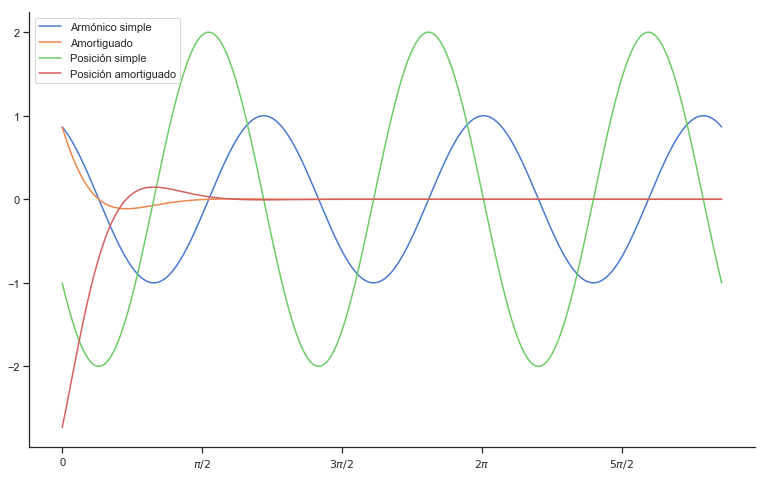

In [74]:
fig, ax = plt.subplots(figsize=(13,8))
ta = np.linspace(0, 3 * np.pi, 1000)
def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
sns.lineplot(ta,f11(ta),label='Armónico simple')
sns.lineplot(ta,f21(ta),label='Amortiguado')
sns.lineplot(ta,d1(ta),label='Posición simple')
sns.lineplot(ta,d2(ta),label='Posición amortiguado')
sns.despine()

<div style="text-align: right"> Diego Emiliano Rodea Ruano 